# **8. Отбор признаков: мотивация**

## **Отбор признаков** — это процесс выбора важных признаков, оказывающих наибольшее влияние на предсказание.

## Задание 8.1

Для чего необходимо производить отбор признаков?

+ Для избавления от мультиколлинеарности признаков
+ Для увеличения скорости обучения модели
+ Для повышения качества предсказательной способности модели

## Задание 8.2

Основываясь на тепловой карте, отметьте, для каких признаков характерна мультиколлинеарность:

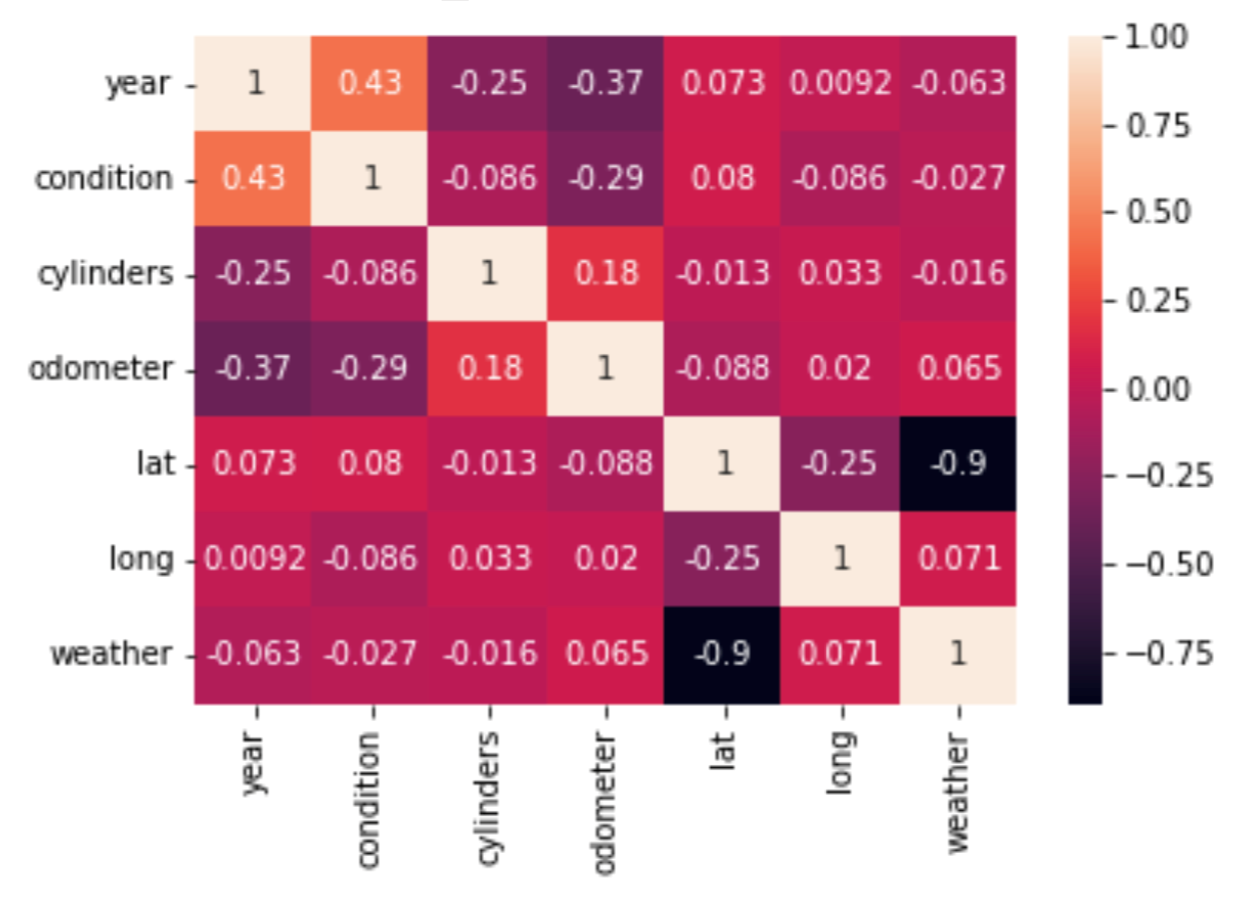

+ lat и weather

## Задание 8.3

Как поступить с избыточными признаками?

+ Удалить один из мультиколлинеарных признаков, при этом оставить тот, который является целым числом



---



In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx') 

Давайте оценим влияние мультиколлинеарности на линейную регрессию:

In [3]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4856.318


Мы выяснили, что у нас присутствует сильная зависимость между lat и weather. Удалим lat, так как этот признак, в отличие от weather, необходимо округлять.

In [4]:
x.drop('lat', axis = 1, inplace = True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4860.258


### ✍ Итак, мы вспомнили о понятии мультиколлинеарности и о его влиянии на отбор признаков. В следующем юните мы разберём автоматические методы отбора признаков, влияющих на качество моделирования.

# **9. Отбор признаков: классификация методов**

## Методы отбора признаков предназначены для уменьшения количества входных переменных до тех значений, которые наиболее полезны для предсказательной способности модели.

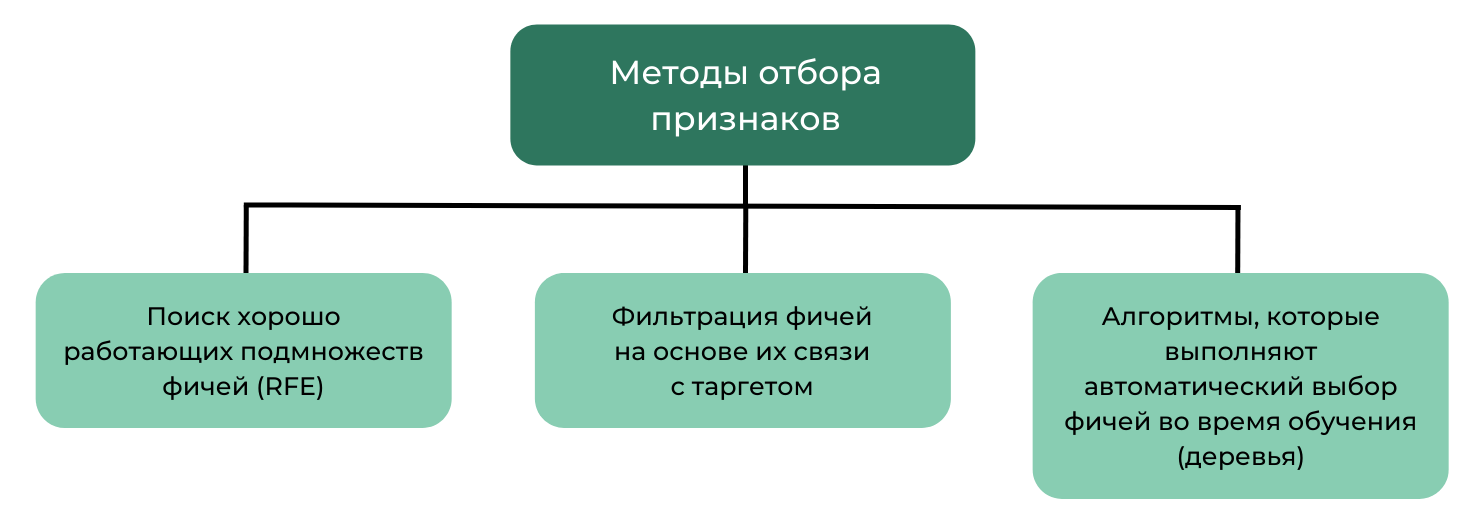

# **RFE**

## **Метод рекурсивного исключения признаков (RFE)** предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала RFE обучается на изначальной выборке и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

Выделим три наиболее значимых признака:

In [6]:
from sklearn.feature_selection import RFE

In [7]:
y = data['price']
x = data.drop(columns='price')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [9]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

Также узнаем, как RFE проранжировал все доступные признаки:

In [10]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [11]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

## Задание 9.1

Какой признак RFE счёл наименее значимым? Используйте метод .ranking_ для ранжирования фичей по степени их важности.

+ odometer


# **МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ**

В качестве фильтров для выбора признаков используются уже знакомые нам статистики, такие как коэффициент корреляции Пирсона, ANOVA и т. д. При этом выбор статистических показателей сильно зависит от типов переменных в данных.

Чем больше известно о типе данных, тем проще выбрать подходящую статистическую меру для метода отбора признаков на основе фильтра. Ниже приведена схема — помощник в выборе метода селекции признаков.

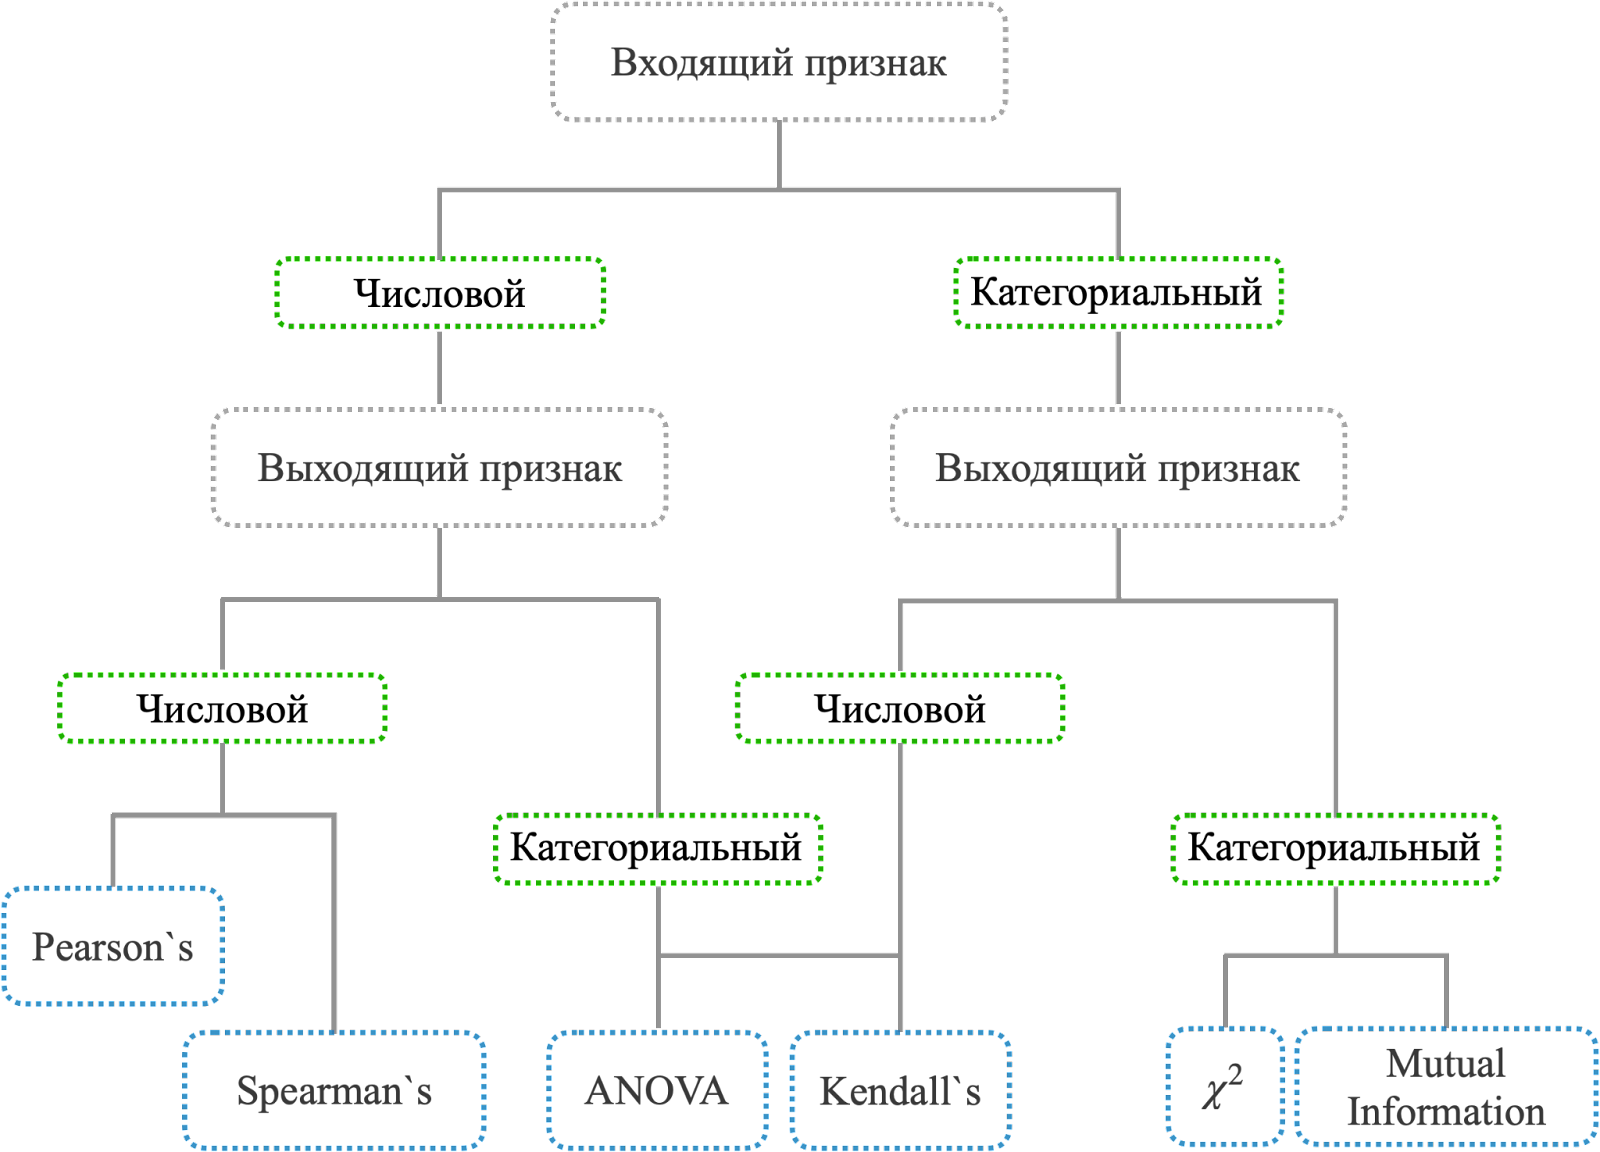

### Библиотека sklearn обеспечивает реализацию большинства полезных статистических показателей, например:

+ коэффициента корреляции Пирсона: f_regression();
+ дисперсионного анализа ANOVA: f_classif();
+ хи-квадрата: chi2();
+ взаимной информации: mutual_info_classif() и mutual_info_regression().

### Кроме того, библиотека SciPy обеспечивает реализацию многих других статистических данных, таких как тау Кендалла (kendalltau) и ранговая корреляция Спирмена (spearmanr).

### sklearn также предоставляет множество различных методов фильтрации после расчёта статистики для каждой входной переменной с целевой.

Два наиболее популярных метода:

+ ыбор k лучших переменных: SelectKBest;
+ выбор переменных верхнего процентиля: SelectPercentile.

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

На этот раз odometer оказался в топе.

## Задание 9.4

Как необходимо дополнить код, чтобы выполнить отбор признаков с помощью ANOVA F-measure?

selector = SelectKBest(___?___, k=3)

+ f_classif